In [36]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from pyarrow import table

import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import volpy_func_ticker_lib as vtp
import option_returns as orpy
from volpy_func_lib import return_df

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)

<module 'vol_strat_lib' from 'D:\\Professionelt\\Code\\volpy\\vol_strat_lib.py'>

In [37]:
# om_folder = "VIX" #SPX_full, i2s1_full_v2', vix_markets_full
# orpy_df, sum_df = vs.import_orpy_sum(om_folder = om_folder)
# 
# sum_df.loc[sum_df["SW_0_30"] <= 1e-6, "SW_0_30"] = 1e-6
# orpy_df.loc[orpy_df["SW_0_30"] <= 1e-6, "SW_0_30"] = 1e-6

In [38]:
importlib.reload(vtp)
orpy_df = vtp.concat_ticker_datasets(vp.VIX_tickers, "orpy")

In [39]:
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30", "#K"], vol_index = True) #, sgy_names = None

In [40]:
(df["VXD"]**2).min()

0.0007344099999999999

In [41]:
# Table
importlib.reload(table_lib)
results_df = table_lib.vix_table(df)
table_lib.latex_vix_table(results_df)

D:\Professionelt\Code\volpy\table_lib.py:516: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([avg_row])], ignore_index=True)


In [42]:
# Latex code for Figures (appendix)
importlib.reload(table_lib)
table_lib.generate_latex_for_pairs(orpy_df[orpy_df["ticker"].isin(["TLT"]) == False])

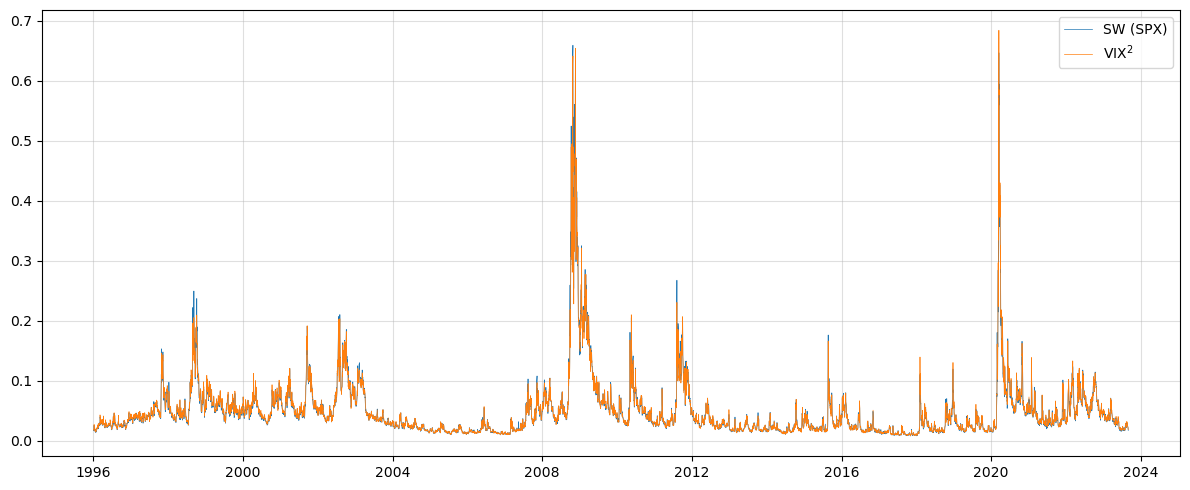

In [43]:
importlib.reload(vp)
vp.plot_ticker_SW_vs_vix(df, "SPX", figsize=(12, 5), show_fig = True, save_fig = True, filename_suffix = "stretched")

In [44]:
# # VIX figures
importlib.reload(vp)
df = vp.make_df_strats(orpy_df, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=None, extra_columns = ["SW_0_30"]) #, sgy_names = None

save_fig = True
show_fig = False

# Level
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_vs_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

# Scaled difference
importlib.reload(vp)
for ticker in orpy_df["ticker"].unique():
    vp.plot_ticker_SW_minus_vix_scaled(df, ticker, figsize=(9, 5), show_fig = show_fig, save_fig = save_fig)

In [45]:
df = df[df["VIX"].isna()==False]
df = df[df["ticker"] == "SPX"]
df = df[df["date"] < pd.Timestamp("2003-02-28")]
print(df["SW_0_30"].mean(), (df["VIX"]**2).mean())

0.0585703662403414 0.059671879482182624
